In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

print("すべてのライブラリが正常に読み込まれました！")


すべてのライブラリが正常に読み込まれました！


In [2]:
def generate_random_image(height=256, width=256, channels=3):
    """
    ランダム画像を生成する関数
    :param height: 画像の高さ
    :param width: 画像の幅
    :param channels: カラーチャンネル数（3ならRGB）
    :return: ランダム画像のNumPy配列
    """
    return np.random.randint(0, 256, (height, width, channels), dtype=np.uint8)

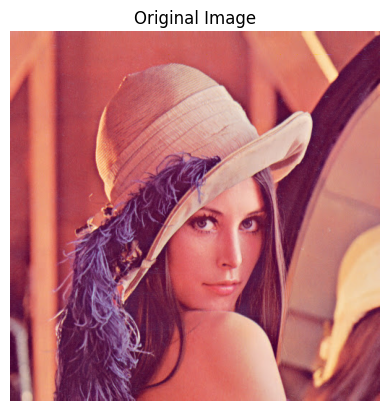

In [3]:
# サンプル画像の読み込み（自分の画像パスに変更可）
img = cv2.imread('rena.jpg')  # 例: 画像ファイル名を適切に変更してください
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()


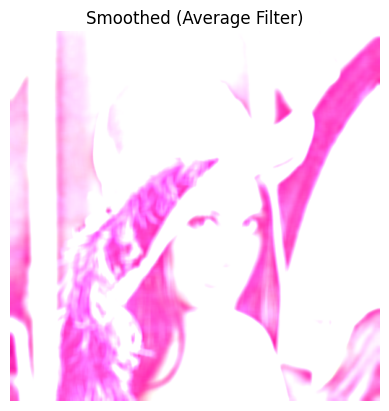

In [4]:
#平均化フィルタ
kernel = np.ones((9,9), np.float32) / 25
smoothed = cv2.filter2D(img_rgb, -1, kernel)

plt.imshow(smoothed)
plt.title('Smoothed (Average Filter)')
plt.axis('off')
plt.show()


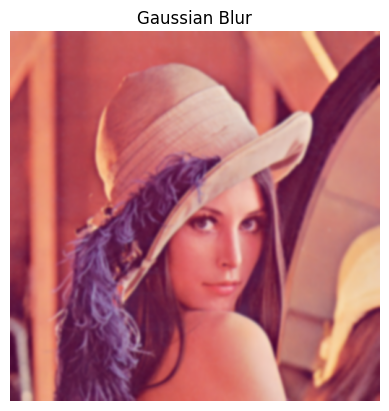

In [5]:
#ガウシアンフィルタ
gaussian = cv2.GaussianBlur(img_rgb, (9, 9), 0)

plt.imshow(gaussian)
plt.title('Gaussian Blur')
plt.axis('off')
plt.show()


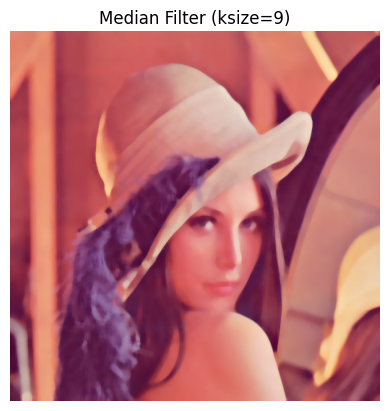

In [6]:
# メディアンフィルタを適用（カーネルサイズ 5）
median_filtered = cv2.medianBlur(img_rgb, 9)

plt.imshow(median_filtered)
plt.title('Median Filter (ksize=9)')
plt.axis('off')
plt.show()


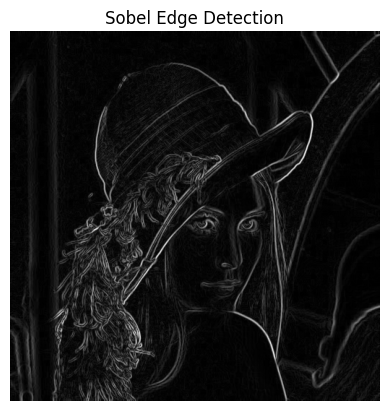

In [7]:
#エッジ検出
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)

plt.imshow(sobel, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')
plt.show()


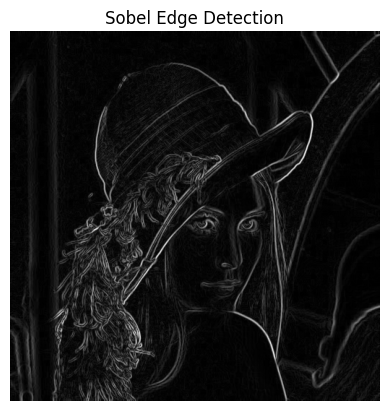

In [8]:
#微分フィルタ
# グレースケールに変換
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# SobelフィルタをX方向・Y方向に適用
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# 勾配の大きさを計算
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)

plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')
plt.show()


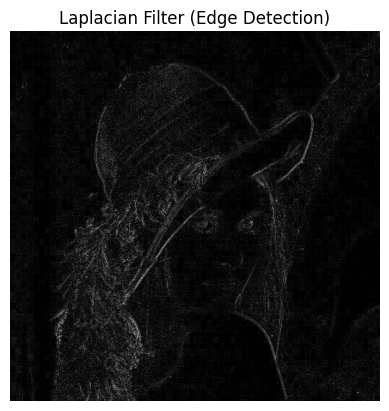

In [9]:
#ラプラシアンフィルタ
# グレースケール変換（必要）
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# ラプラシアンフィルタ適用（2次微分）
laplacian = cv2.Laplacian(gray, cv2.CV_64F)

# 表示（絶対値にして正規化すると見やすくなる）
laplacian_abs = cv2.convertScaleAbs(laplacian)

plt.imshow(laplacian_abs, cmap='gray')
plt.title('Laplacian Filter (Edge Detection)')
plt.axis('off')
plt.show()


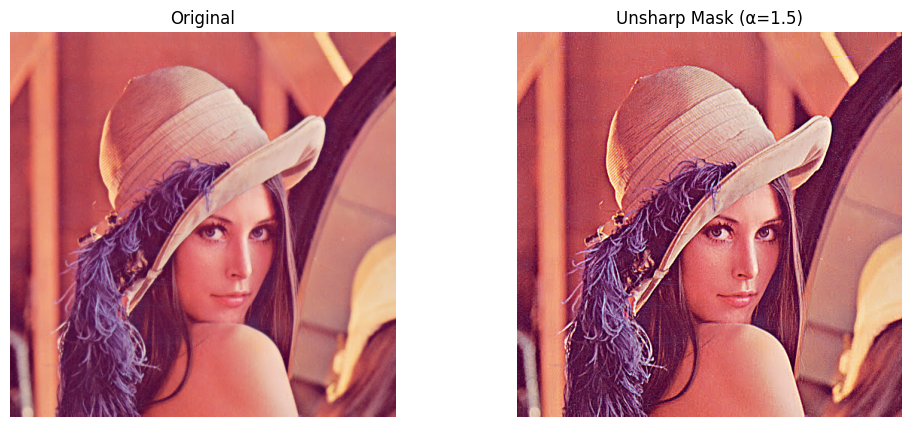

In [10]:
#アンシャープマスク
# 元画像（カラー）で実施
blurred = cv2.GaussianBlur(img_rgb, (7, 7), 0)

# アンシャープマスク = 元画像 + α × (元画像 - ぼかし画像)
alpha = 1.5  # シャープの強さ（1.0～2.0ぐらいが目安）
sharpened = cv2.addWeighted(img_rgb, 1 + alpha, blurred, -alpha, 0)

# 表示
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened)
plt.title(f"Unsharp Mask (α={alpha})")
plt.axis('off')
plt.show()
